# Krystyn Gutu

**Stock Prediction**

Build a trading (security) strategy for future stock purchases based on historical values.

# General Motors Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf

import warnings
warnings.filterwarnings("ignore")

**Importing data, pre-processing, & cleaning the data.**

In [2]:
# Calculate 01.01.2015 minus 300 days (in order to calculate 200 moving day averages from 01.01.2015 onward, later on)
# Subtracted 300 days to be safe

import datetime

starting_date = datetime.date(2015, 1, 1)
days = datetime.timedelta(300)

new_starting_date = starting_date - days

print(new_starting_date)

2014-03-07


In [3]:
gm = yf.download("GM", start = new_starting_date, end = "2021-12-31")

[*********************100%%**********************]  1 of 1 completed


**Cleaning null values & analyzing basic data info.**

<Axes: xlabel='Date', ylabel='Close'>

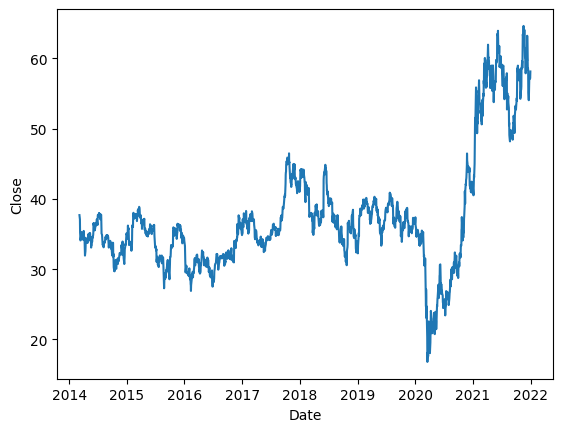

In [4]:
gm = gm.dropna(axis = 0)
sns.lineplot(x =  gm.index, y = "Close", data = gm)

In [5]:
gm.isnull().values.any()

False

In [6]:
gm.shape

(1970, 6)

In [7]:
gm.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [8]:
gm["Adj Close Next Day"] = gm["Adj Close"].shift(periods = -1)
gm.tail()

,Open,High,Low,Close,Adj Close,Volume,Adj Close Next Day
Date,,,,,,,
2021-12-23,56.070000,57.090000,55.770000,56.910000,55.888134,13722300,56.398804
2021-12-27,56.889999,57.750000,56.529999,57.430000,56.398804,9078900,56.084545
2021-12-28,57.400002,58.119999,57.009998,57.110001,56.084545,8577700,56.202400
2021-12-29,57.110001,57.700001,56.740002,57.230000,56.202400,7982300,57.086235
2021-12-30,57.450001,58.779999,57.259998,58.130001,57.086235,11965900,NaN


In [9]:
gm = gm.dropna(axis = 0)
gm.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Adj Close Next Day'],
      dtype='object')

In [10]:
gm

,Open,High,Low,Close,Adj Close,Volume,Adj Close Next Day
Date,,,,,,,
2014-03-07,37.939999,38.009998,37.450001,37.689999,28.607307,17547800,28.151897
2014-03-10,37.560001,37.560001,36.759998,37.090000,28.151897,17552600,26.702171
2014-03-11,37.000000,37.119999,35.020000,35.180000,26.702171,41033400,26.459290
2014-03-12,34.759998,35.250000,34.369999,34.860001,26.459290,46300500,25.874849
2014-03-13,35.040001,35.160000,33.869999,34.090000,25.874849,39628600,26.104576
...,...,...,...,...,...,...,...
2021-12-22,54.790001,56.349998,54.750000,56.080002,55.073048,16694000,55.888134
2021-12-23,56.070000,57.090000,55.770000,56.910000,55.888134,13722300,56.398804
2021-12-27,56.889999,57.750000,56.529999,57.430000,56.398804,9078900,56.084545


In [11]:
gm.shape

(1969, 7)

In [12]:
gm.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,1969.0,3.744464e+01,8.383490e+00,1.634000e+01,3.240000e+01,3.568000e+01,3.898000e+01,6.433000e+01
High,1969.0,3.785972e+01,8.480558e+00,1.856000e+01,3.285000e+01,3.600000e+01,3.938000e+01,6.518000e+01
Low,1969.0,3.697996e+01,8.270023e+00,1.433000e+01,3.199000e+01,3.533000e+01,3.867000e+01,6.269000e+01
Close,1969.0,3.742165e+01,8.383422e+00,1.680000e+01,3.234000e+01,3.567000e+01,3.901000e+01,6.461000e+01
Adj Close,1969.0,3.358755e+01,9.454895e+00,1.649834e+01,2.672483e+01,3.112345e+01,3.641823e+01,6.344989e+01
Volume,1969.0,1.417007e+07,7.290168e+06,2.899300e+06,9.500000e+06,1.246440e+07,1.656240e+07,6.766720e+07
Adj Close Next Day,1969.0,3.360202e+01,9.469045e+00,1.649834e+01,2.672483e+01,3.112962e+01,3.643644e+01,6.344989e+01


**Correlations**

In [13]:
gm.corr(method = "pearson")

,Open,High,Low,Close,Adj Close,Volume,Adj Close Next Day
Open,1.000000,0.998698,0.998606,0.997524,0.966709,0.124904,0.963098
High,0.998698,1.000000,0.998144,0.998847,0.970285,0.140949,0.966636
Low,0.998606,0.998144,1.000000,0.998757,0.965149,0.104213,0.961454
Close,0.997524,0.998847,0.998757,1.000000,0.968621,0.123563,0.964873
Adj Close,0.966709,0.970285,0.965149,0.968621,1.000000,0.111868,0.997044
Volume,0.124904,0.140949,0.104213,0.123563,0.111868,1.000000,0.114355
Adj Close Next Day,0.963098,0.966636,0.961454,0.964873,0.997044,0.114355,1.000000


In [14]:
gm.corr(method = "spearman")

,Open,High,Low,Close,Adj Close,Volume,Adj Close Next Day
Open,1.000000,0.997330,0.997106,0.994482,0.920870,-0.038544,0.915097
High,0.997330,1.000000,0.996574,0.997405,0.926286,-0.025319,0.920557
Low,0.997106,0.996574,1.000000,0.997584,0.919951,-0.058224,0.914376
Close,0.994482,0.997405,0.997584,1.000000,0.924316,-0.042459,0.918749
Adj Close,0.920870,0.926286,0.919951,0.924316,1.000000,-0.087201,0.995236
Volume,-0.038544,-0.025319,-0.058224,-0.042459,-0.087201,1.000000,-0.086198
Adj Close Next Day,0.915097,0.920557,0.914376,0.918749,0.995236,-0.086198,1.000000


In [15]:
gm.corr(method = "kendall")

,Open,High,Low,Close,Adj Close,Volume,Adj Close Next Day
Open,1.000000,0.964014,0.960516,0.942519,0.777827,-0.031710,0.765539
High,0.964014,1.000000,0.957547,0.962952,0.787600,-0.022648,0.773784
Low,0.960516,0.957547,1.000000,0.965007,0.779663,-0.045579,0.766061
Close,0.942519,0.962952,0.965007,1.000000,0.789835,-0.034875,0.773145
Adj Close,0.777827,0.787600,0.779663,0.789835,1.000000,-0.067368,0.944890
Volume,-0.031710,-0.022648,-0.045579,-0.034875,-0.067368,1.000000,-0.066751
Adj Close Next Day,0.765539,0.773784,0.766061,0.773145,0.944890,-0.066751,1.000000


**Plotting Data**

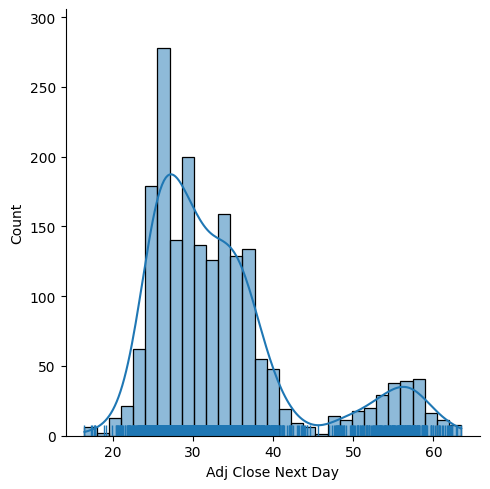

In [16]:
sns.displot(gm["Adj Close Next Day"], kde = True, rug = True)

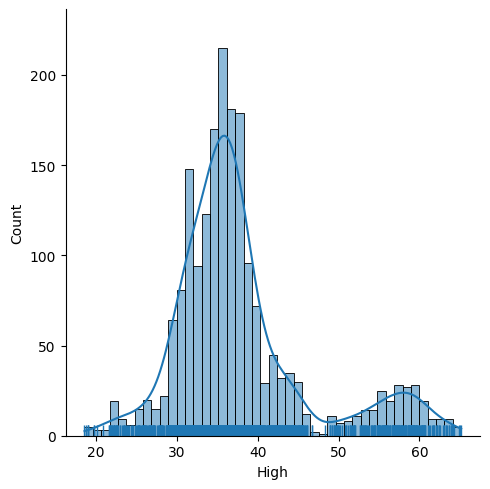

In [17]:
sns.displot(gm["High"], kde = True, rug = True)

**Strategy 1: "buy" = next trading day's close price > today's close price; otherwise, "sell".**

In [18]:
strategy_1 = gm.copy()

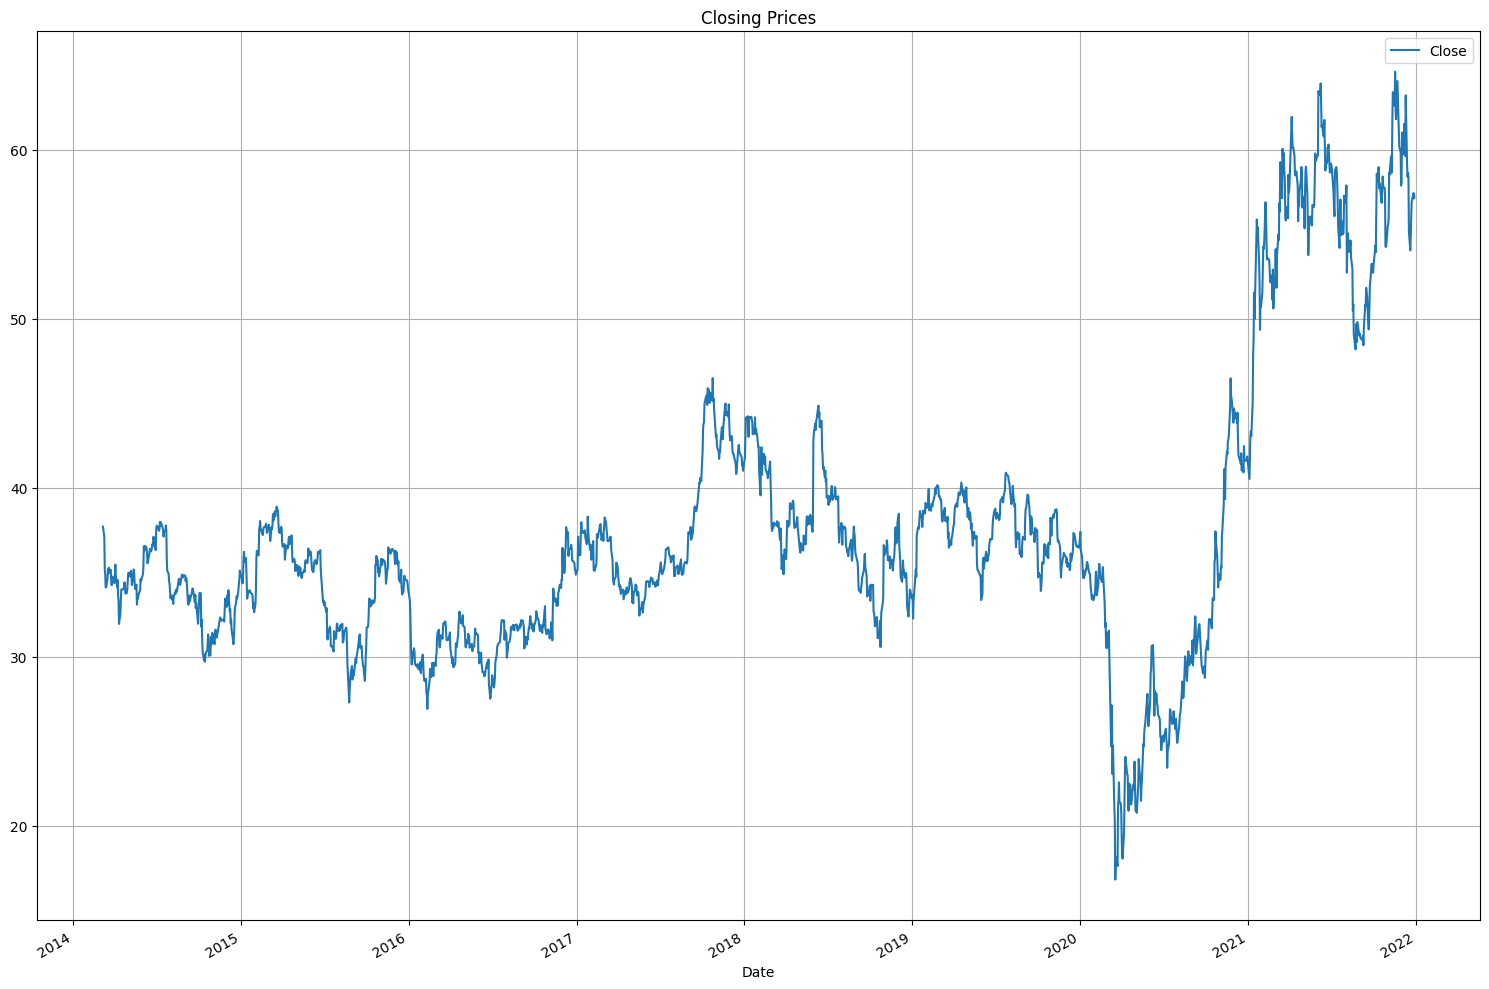

In [19]:
fig, axes = plt.subplots(1, 1, figsize = (15, 10))
strategy_1[["Close"]].plot(figsize = (15, 10), grid = True, title = "Closing Prices", ax = axes)

axes.legend()
fig.tight_layout()

In [20]:
strategy_1["y_1"] = np.where(strategy_1["Close"].shift(-1) > strategy_1["Close"], 1, -1)

In [21]:
strategy_1.dropna().head()

,Open,High,Low,Close,Adj Close,Volume,Adj Close Next Day,y_1
Date,,,,,,,,
2014-03-07,37.939999,38.009998,37.450001,37.689999,28.607307,17547800,28.151897,-1
2014-03-10,37.560001,37.560001,36.759998,37.090000,28.151897,17552600,26.702171,-1
2014-03-11,37.000000,37.119999,35.020000,35.180000,26.702171,41033400,26.459290,-1
2014-03-12,34.759998,35.250000,34.369999,34.860001,26.459290,46300500,25.874849,-1
2014-03-13,35.040001,35.160000,33.869999,34.090000,25.874849,39628600,26.104576,-1


**Strategy 2 utilizes 50-day moving average for short-term & 200-day moving average for long-term.**

The target variable, y, also known as the signal, should either be a buy signal (y = 1) or sell signal (y = -1) of the stock based on feature variables (x).

In [22]:
strategy_2 = gm.copy()

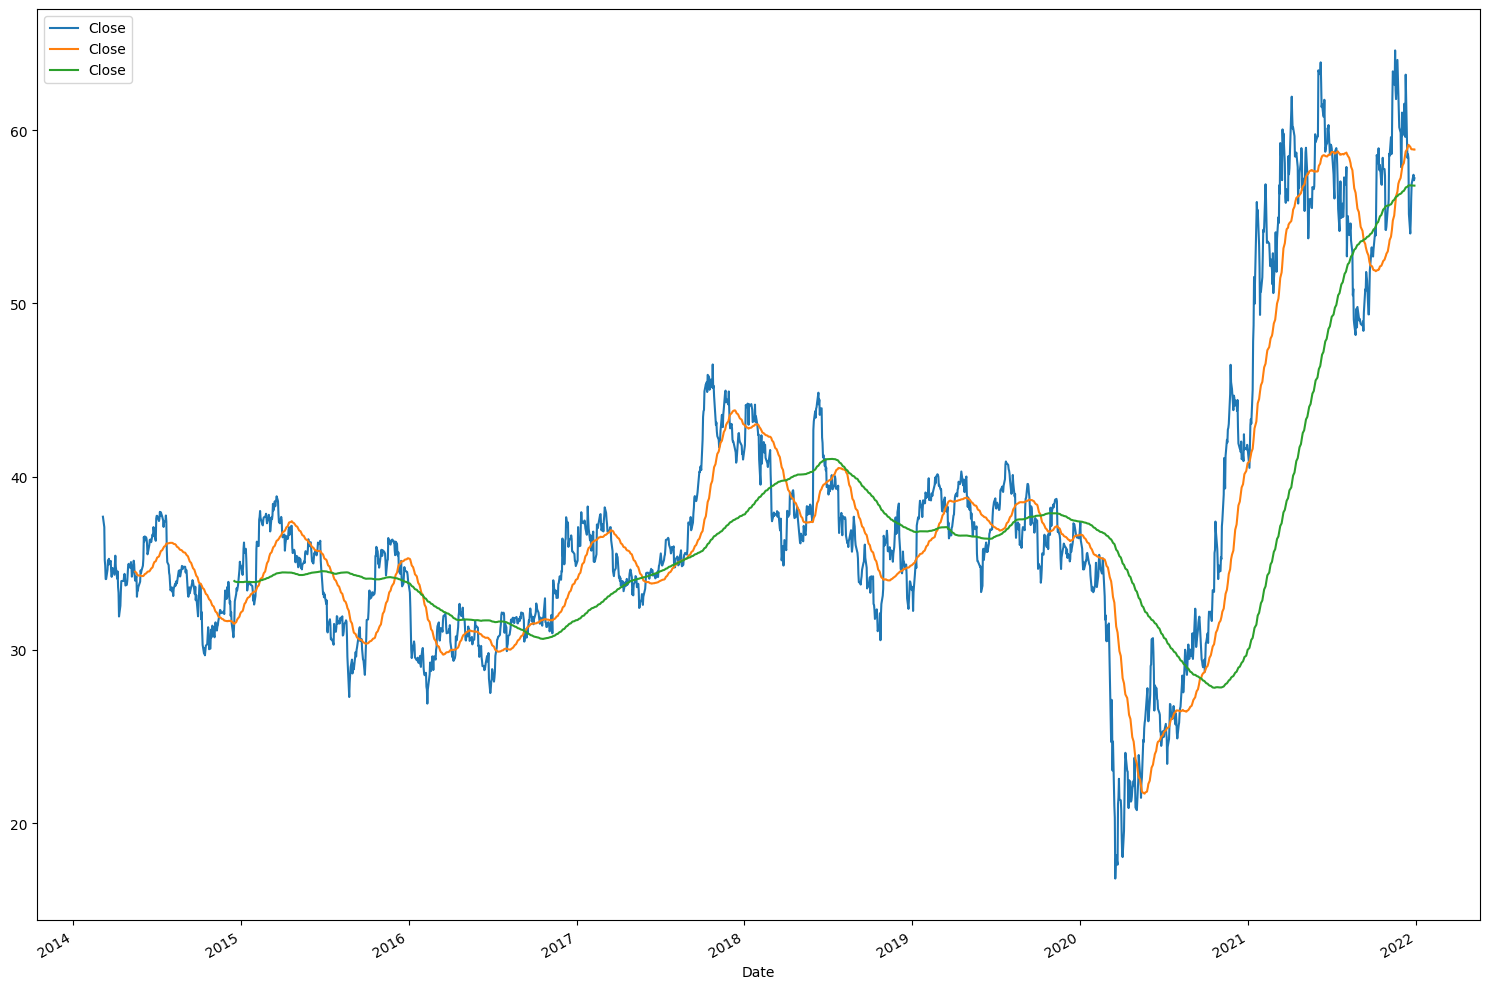

In [23]:
strategy_2["Close"] = pd.to_numeric(strategy_2["Close"], errors = "coerce")
strategy_2[["Close"]].plot(figsize = (10, 8))

strategy_2["50 Day Moving Average"] = strategy_2["Close"].rolling(50).mean().plot(figsize=(15, 10))
strategy_2["200 Day Moving Average"] = strategy_2["Close"].rolling(200).mean().plot(figsize=(15, 10))

plt.legend()
plt.tight_layout()
plt.show()

In [24]:
strategy_2["50 Day Moving Average"] = strategy_2["Close"].rolling(50).mean()
strategy_2["200 Day Moving Average"] = strategy_2["Close"].rolling(200).mean()

strategy_2.dropna().head()

,Open,High,Low,Close,Adj Close,Volume,Adj Close Next Day,50 Day Moving Average,200 Day Moving Average
Date,,,,,,,,,
2014-12-18,31.639999,31.750000,31.170000,31.750000,24.950634,14112000,25.783636,31.5068,33.97545
2014-12-19,31.760000,32.930000,31.750000,32.810001,25.783636,18990900,26.113693,31.5424,33.95105
2014-12-22,32.630001,33.310001,32.619999,33.230000,26.113693,13243700,26.373020,31.6012,33.93175
2014-12-23,33.480000,33.700001,33.380001,33.560001,26.373020,8469500,26.270864,31.6766,33.92365
2014-12-24,33.529999,33.590000,33.240002,33.430000,26.270864,4496000,26.506613,31.7430,33.91650


In [25]:
strategy_2["y_2"] = np.where(strategy_2["50 Day Moving Average"] > strategy_2["200 Day Moving Average"], 1, -1)

**Define feature variable "X" & label / target variable "y".**

In [26]:
strategy_1.isnull().any()

Open                  False
High                  False
Low                   False
Close                 False
Adj Close             False
Volume                False
Adj Close Next Day    False
y_1                   False
dtype: bool

In [27]:
strategy_2.isnull().any()

Open                      False
High                      False
Low                       False
Close                     False
Adj Close                 False
Volume                    False
Adj Close Next Day        False
50 Day Moving Average      True
200 Day Moving Average     True
y_2                       False
dtype: bool

In [28]:
mask = False
for col in strategy_2.columns:
    mask = mask | strategy_2[col].isnull()
strategy_2_nulls = strategy_2[mask]
print(strategy_2_nulls)

                 Open       High        Low      Close  Adj Close    Volume  \
Date                                                                          
2014-03-07  37.939999  38.009998  37.450001  37.689999  28.607307  17547800   
2014-03-10  37.560001  37.560001  36.759998  37.090000  28.151897  17552600   
2014-03-11  37.000000  37.119999  35.020000  35.180000  26.702171  41033400   
2014-03-12  34.759998  35.250000  34.369999  34.860001  26.459290  46300500   
2014-03-13  35.040001  35.160000  33.869999  34.090000  25.874849  39628600   
...               ...        ...        ...        ...        ...       ...   
2014-12-11  32.139999  32.689999  31.990000  32.189999  25.296408  13282600   
2014-12-12  31.940001  32.160000  31.570000  31.570000  24.809187  11239100   
2014-12-15  31.700001  31.770000  30.980000  31.000000  24.361254  16084000   
2014-12-16  30.620001  31.059999  30.299999  30.730000  24.149075  24294000   
2014-12-17  30.809999  31.299999  30.639999  31.1500

In [29]:
strategy_2 = strategy_2[208:]

In [30]:
strategy_2.isnull().any()

Open                      False
High                      False
Low                       False
Close                     False
Adj Close                 False
Volume                    False
Adj Close Next Day        False
50 Day Moving Average     False
200 Day Moving Average    False
y_2                       False
dtype: bool

In [31]:
strategy_2

,Open,High,Low,Close,Adj Close,Volume,Adj Close Next Day,50 Day Moving Average,200 Day Moving Average,y_2
Date,,,,,,,,,,
2015-01-02,35.270000,35.310001,34.410000,34.840000,27.378906,9756700,26.978119,32.1854,33.91790,-1
2015-01-05,34.980000,35.250000,34.070000,34.330002,26.978119,16223000,27.386763,32.2458,33.91325,-1
2015-01-06,34.410000,35.220001,34.099998,34.849998,27.386763,17747600,28.164753,32.3242,33.91245,-1
2015-01-07,35.230000,35.950001,35.040001,35.840000,28.164753,19319200,28.447653,32.4402,33.91595,-1
2015-01-08,36.060001,36.450001,35.799999,36.200001,28.447653,15206600,27.968292,32.5626,33.92440,-1
...,...,...,...,...,...,...,...,...,...,...
2021-12-22,54.790001,56.349998,54.750000,56.080002,55.073048,16694000,55.888134,58.9190,56.81355,1
2021-12-23,56.070000,57.090000,55.770000,56.910000,55.888134,13722300,56.398804,58.9018,56.81645,1
2021-12-27,56.889999,57.750000,56.529999,57.430000,56.398804,9078900,56.084545,58.8966,56.80730,1


In [32]:
X1 = strategy_1.iloc[:, : -1].values
y1 = strategy_1.iloc[:, -1].values

X2 = strategy_2.iloc[:, : -1].values
y2 = strategy_2.iloc[:, -1].values

**Split data into training & test sets, using an 80 / 20 percent ratio.**

Pre-processing & training the test split.

In [33]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import cross_val_score
scaler = StandardScaler()

In [34]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.20)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = 0.20)

In [35]:
X1_train = scaler.fit_transform(X1_train)
X1_test = scaler.transform(X1_test)
X2_train = scaler.fit_transform(X2_train)
X2_test = scaler.transform(X2_test)

**Training and predicting classifiers, taking default parameters.**

In [36]:
strategy_1["y_1"].value_counts()

y_1
 1    1001
-1     968
Name: count, dtype: int64

In [37]:
strategy_2["y_2"].value_counts()

y_2
 1    914
-1    847
Name: count, dtype: int64

**K-Nearest Neighbors (KNN)**

In [38]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from math import sqrt
from sklearn import metrics
from sklearn.metrics import f1_score

In [39]:
knn1 = KNeighborsClassifier()
knn1.fit(X1_train, y1_train)

knn2 = KNeighborsClassifier()
knn2.fit(X2_train, y2_train)

KNeighborsClassifier()

In [40]:
accuracy_train = accuracy_score(y1_train, knn1.predict(X1_train))
accuracy_test = accuracy_score(y1_test, knn1.predict(X1_test))
print("KNN1 Accuracy Score (Training): %.6f" %accuracy_train)
print("KNN1 Accuracy Score (Testing): %.6f" %accuracy_test)

print("\n")

accuracy_train = accuracy_score(y2_train, knn2.predict(X2_train))
accuracy_test = accuracy_score(y2_test, knn2.predict(X2_test))
print("KNN2 Accuracy Score (Training): %.6f" %accuracy_train)
print("KNN2 Accuracy Score (Testing): %.6f" %accuracy_test)

KNN1 Accuracy Score (Training): 0.748571
KNN1 Accuracy Score (Testing): 0.565990


KNN2 Accuracy Score (Training): 0.962358
KNN2 Accuracy Score (Testing): 0.932011


In [41]:
print("KNN1 Accuracy Using Cross-Validation: ", cross_val_score(knn1, X1_train, y1_train, cv = 5))
print("KNN2 Accuracy Using Cross-Validation: ", cross_val_score(knn2, X2_train, y2_train, cv = 5))

KNN1 Accuracy Using Cross-Validation:  [0.55238095 0.58095238 0.55555556 0.5047619  0.57142857]
KNN2 Accuracy Using Cross-Validation:  [0.88652482 0.92553191 0.92553191 0.93238434 0.92170819]


**Random Forest Classifier (RF)**

In [42]:
from sklearn.ensemble import RandomForestClassifier

In [43]:
rf1 = RandomForestClassifier()
rf1.fit(X1_train, y1_train)

rf2 = RandomForestClassifier()
rf2.fit(X2_train, y2_train)

RandomForestClassifier()

In [44]:
accuracy_train = accuracy_score(y1_train, rf1.predict(X1_train))
accuracy_test = accuracy_score(y1_test, rf1.predict(X1_test))
print("RF1 Accuracy Score (Training): %.6f" %accuracy_train)
print("RF1 Accuracy Score (Testing): %.6f" %accuracy_test)

print("\n")

accuracy_train = accuracy_score(y2_train, rf2.predict(X2_train))
accuracy_test = accuracy_score(y2_test, rf2.predict(X2_test))
print("RF2 Accuracy Score (Training): %.6f" %accuracy_train)
print("RF2 Accuracy Score (Testing): %.6f" %accuracy_test)

RF1 Accuracy Score (Training): 1.000000
RF1 Accuracy Score (Testing): 0.720812


RF2 Accuracy Score (Training): 1.000000
RF2 Accuracy Score (Testing): 0.980170


In [45]:
print("RF1 Accuracy Using Cross-Validation: ", cross_val_score(rf1, X1_train, y1_train, cv = 5))
print("RF2 Accuracy Using Cross-Validation: ", cross_val_score(rf2, X2_train, y2_train, cv = 5))

RF1 Accuracy Using Cross-Validation:  [0.66984127 0.70793651 0.72380952 0.6984127  0.78095238]
RF2 Accuracy Using Cross-Validation:  [0.97163121 0.9893617  0.9893617  0.99288256 0.98576512]


**Gradient Boosting Classifier (GB)**

In [46]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import MinMaxScaler

In [47]:
gb1 = GradientBoostingClassifier()
gb1.fit(X1_train, y1_train)

gb2 = GradientBoostingClassifier()
gb2.fit(X2_train, y2_train)

GradientBoostingClassifier()

In [48]:
print("GB1 Accuracy Score (Training): {0:.6f}".format(gb1.score(X1_train, y1_train)))
print("GB1 Accuracy Score (Testing): {0:.6f}".format(gb1.score(X1_test, y1_test)))

print("\n")

print("GB2 Accuracy Score (Training): {0:.6f}".format(gb2.score(X2_train, y2_train)))
print("GB2 Accuracy Score (Testing): {0:.6f}".format(gb2.score(X2_test, y2_test)))

GB1 Accuracy Score (Training): 0.928889
GB1 Accuracy Score (Testing): 0.822335


GB2 Accuracy Score (Training): 1.000000
GB2 Accuracy Score (Testing): 0.977337


In [49]:
print("GB1 Accuracy Using Cross-Validation: ", cross_val_score(gb1, X1_train, y1_train, cv = 5))
print("GB2 Accuracy Using Cross-Validation: ", cross_val_score(gb2, X2_train, y2_train, cv = 5))

GB1 Accuracy Using Cross-Validation:  [0.77460317 0.74603175 0.78095238 0.76825397 0.79365079]
GB2 Accuracy Using Cross-Validation:  [0.9787234  0.9929078  0.9893617  0.98576512 0.98220641]


**Support Vector Machines (SVM)**

In [50]:
from sklearn.svm import SVC

In [51]:
lsvm1 = SVC()
lsvm1.fit(X1_train, y1_train)

lsvm2 = SVC()
lsvm2.fit(X2_train, y2_train)

SVC()

In [52]:
print("LSVM1 Accuracy Score (Training): {0:.6f}".format(lsvm1.score(X1_train, y1_train)))
print("LSVM1 Accuracy Score (Testing): {0:.6f}".format(lsvm1.score(X1_test, y1_test)))

print("\n")

print("LSVM2 Accuracy Score (Training): {0:.6f}".format(lsvm2.score(X2_train, y2_train)))
print("LSVM2 Accuracy Score (Testing): {0:.6f}".format(lsvm2.score(X2_test, y2_test)))

LSVM1 Accuracy Score (Training): 0.657778
LSVM1 Accuracy Score (Testing): 0.619289


LSVM2 Accuracy Score (Training): 0.951705
LSVM2 Accuracy Score (Testing): 0.934844


In [53]:
print("LSVM1 Accuracy Using Cross-Validation: ", cross_val_score(lsvm1, X1_train, y1_train, cv = 5))
print("LSVM2 Accuracy Using Cross-Validation: ", cross_val_score(lsvm2, X2_train, y2_train, cv = 5))

LSVM1 Accuracy Using Cross-Validation:  [0.6        0.6031746  0.65714286 0.58412698 0.6031746 ]
LSVM2 Accuracy Using Cross-Validation:  [0.90780142 0.94680851 0.93262411 0.93950178 0.9252669 ]


**XGBoost Classifier (XGB)**

In [54]:
import xgboost
from xgboost import XGBClassifier

In [55]:
y1_train_mapped = np.where(y1_train == -1, 0, y1_train)
y2_train_mapped = np.where(y2_train == -1, 0, y2_train)

xgb1 = XGBClassifier()
xgb1.fit(X1_train, y1_train_mapped)

xgb2 = XGBClassifier()
xgb2.fit(X2_train, y2_train_mapped)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [56]:
print("XGB1 Accuracy Score (Training): {0:.6f}".format(xgb1.score(X1_train, y1_train)))
print("XGB1 Accuracy Score (Testing): {0:.6f}".format(xgb1.score(X1_test, y1_test)))

print("\n")

print("XGB2 Accuracy Score (Training): {0:.6f}".format(xgb2.score(X2_train, y2_train)))
print("XGB2 Accuracy Score (Testing): {0:.6f}".format(xgb2.score(X2_test, y2_test)))

XGB1 Accuracy Score (Training): 0.516825
XGB1 Accuracy Score (Testing): 0.401015


XGB2 Accuracy Score (Training): 0.522017
XGB2 Accuracy Score (Testing): 0.504249


**Evaluate the Classifier on the Test Set**

In [57]:
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

**K-Nearest Neighbors (KNN)**

In [58]:
knn1_y_pred = knn1.predict(X1_test)
knn2_y_pred = knn2.predict(X2_test)

In [59]:
print("KNN1 F1-Score (Testing): ", f1_score(y1_test, knn1_y_pred))
print("KNN2 F1-Score (Testing): ", f1_score(y2_test, knn2_y_pred))

KNN1 F1-Score (Testing):  0.5777777777777777
KNN2 F1-Score (Testing):  0.9337016574585636


In [60]:
print("KNN1 Precision Score: ", precision_score(y1_test, knn1_y_pred))
print("KNN2 Precision Score: ", precision_score(y2_test, knn2_y_pred))

KNN1 Precision Score:  0.5294117647058824
KNN2 Precision Score:  0.9234972677595629


In [61]:
print("KNN1 Recall Score: ", recall_score(y1_test, knn1_y_pred))
print("KNN2 Recall Score: ", recall_score(y2_test, knn2_y_pred))

KNN1 Recall Score:  0.6358695652173914
KNN2 Recall Score:  0.9441340782122905


In [62]:
knn1_roc_auc_curve = roc_auc_score(y1_test, knn1_y_pred)
print("KNN1 ROC-AUC-Curve: ", knn1_roc_auc_curve)
knn2_roc_auc_curve = roc_auc_score(y2_test, knn2_y_pred)
print("KNN2 ROC-AUC-Curve: ", knn2_roc_auc_curve)

KNN1 ROC-AUC-Curve:  0.570315734989648
KNN2 ROC-AUC-Curve:  0.931837154048674


In [63]:
print("K-Nearest-Neighbor Strategy 1 \nConfusion Matrix: \n", confusion_matrix(y1_test, knn1_y_pred))

K-Nearest-Neighbor Strategy 1 
Confusion Matrix: 
 [[106 104]
 [ 67 117]]


In [64]:
print("K-Nearest-Neighbor Strategy 2 \nConfusion Matrix: \n", confusion_matrix(y2_test, knn2_y_pred))

K-Nearest-Neighbor Strategy 2 
Confusion Matrix: 
 [[160  14]
 [ 10 169]]


In [65]:
print("K-Nearest-Neighbor Strategy 1 \nClassification Matrix: \n", classification_report(y1_test, knn1_y_pred))

K-Nearest-Neighbor Strategy 1 
Classification Matrix: 
               precision    recall  f1-score   support

          -1       0.61      0.50      0.55       210
           1       0.53      0.64      0.58       184

    accuracy                           0.57       394
   macro avg       0.57      0.57      0.57       394
weighted avg       0.57      0.57      0.56       394



In [66]:
print("K-Nearest-Neighbor Strategy 2 \nClassification Matrix: \n", classification_report(y2_test, knn2_y_pred))

K-Nearest-Neighbor Strategy 2 
Classification Matrix: 
               precision    recall  f1-score   support

          -1       0.94      0.92      0.93       174
           1       0.92      0.94      0.93       179

    accuracy                           0.93       353
   macro avg       0.93      0.93      0.93       353
weighted avg       0.93      0.93      0.93       353



**Random Forest Classifier (RF)**

In [67]:
rf1_y_pred = rf1.predict(X1_test)
rf2_y_pred = rf2.predict(X2_test)

In [68]:
print("RF1 F1-Score (Testing): ", f1_score(y1_test, rf1_y_pred))
print("RF2 F1-Score (Testing): ", f1_score(y2_test, rf2_y_pred))

RF1 F1-Score (Testing):  0.7105263157894737
RF2 F1-Score (Testing):  0.9806094182825486


In [69]:
print("RF1 Precision Score: ", precision_score(y1_test, rf1_y_pred))
print("RF2 Precision Score: ", precision_score(y2_test, rf2_y_pred))

RF1 Precision Score:  0.6887755102040817
RF2 Precision Score:  0.9725274725274725


In [70]:
print("RF1 Recall Score: ", recall_score(y1_test, rf1_y_pred))
print("RF2 Recall Score: ", recall_score(y2_test, rf2_y_pred))

RF1 Recall Score:  0.7336956521739131
RF2 Recall Score:  0.9888268156424581


In [71]:
rf1_roc_auc_curve = roc_auc_score(y1_test, rf1_y_pred)
print("RF1 ROC-AUC-Curve: ", rf1_roc_auc_curve)
rf2_roc_auc_curve = roc_auc_score(y2_test, rf2_y_pred)
print("RF2 ROC-AUC-Curve: ", rf2_roc_auc_curve)

RF1 ROC-AUC-Curve:  0.7216097308488613
RF2 ROC-AUC-Curve:  0.980045591729275


In [72]:
print("Random Forest Strategy 1 \nConfusion Matrix: \n", confusion_matrix(y1_test, rf1_y_pred))

Random Forest Strategy 1 
Confusion Matrix: 
 [[149  61]
 [ 49 135]]


In [73]:
print("Random Forest Strategy 2 \nConfusion Matrix: \n", confusion_matrix(y2_test, rf2_y_pred))

Random Forest Strategy 2 
Confusion Matrix: 
 [[169   5]
 [  2 177]]


In [74]:
print("Random Forest Strategy 1 \nClassification Report: \n", classification_report(y1_test, rf1_y_pred))

Random Forest Strategy 1 
Classification Report: 
               precision    recall  f1-score   support

          -1       0.75      0.71      0.73       210
           1       0.69      0.73      0.71       184

    accuracy                           0.72       394
   macro avg       0.72      0.72      0.72       394
weighted avg       0.72      0.72      0.72       394



In [75]:
print("Random Forest Strategy 2 \nClassification Report: \n", classification_report(y2_test, rf2_y_pred))

Random Forest Strategy 2 
Classification Report: 
               precision    recall  f1-score   support

          -1       0.99      0.97      0.98       174
           1       0.97      0.99      0.98       179

    accuracy                           0.98       353
   macro avg       0.98      0.98      0.98       353
weighted avg       0.98      0.98      0.98       353



**Gradient Boosting Classifier (GB)**

In [76]:
gb1_y_pred = gb1.predict(X1_test)
gb2_y_pred = gb2.predict(X2_test)

In [77]:
print("GB1 F1-Score: ", f1_score(y1_test, gb1_y_pred))
print("GB2 F1-Score: ", f1_score(y2_test, gb2_y_pred))

GB1 F1-Score:  0.8205128205128205
GB2 F1-Score:  0.9781420765027322


In [78]:
print("GB1 Precision Score: ", precision_score(y1_test, gb1_y_pred))
print("GB2 Precision Score: ", precision_score(y2_test, gb2_y_pred))

GB1 Precision Score:  0.7766990291262136
GB2 Precision Score:  0.9572192513368984


In [79]:
print("GB1 Recall Score: ", recall_score(y1_test, gb1_y_pred))
print("GB2 Recall Score: ", recall_score(y2_test, gb2_y_pred))

GB1 Recall Score:  0.8695652173913043
GB2 Recall Score:  1.0


In [80]:
gb1_roc_auc_curve = roc_auc_score(y1_test, gb1_y_pred)
print("GB1 ROC-AUC-Curve: ", gb1_roc_auc_curve)
gb2_roc_auc_curve = roc_auc_score(y2_test, gb2_y_pred)
print("GB2 ROC-AUC-Curve: ", gb2_roc_auc_curve)

GB1 ROC-AUC-Curve:  0.8252587991718426
GB2 ROC-AUC-Curve:  0.9770114942528736


In [81]:
print("Gradient Boosting Strategy 1 \nConfusion Matrix: \n", confusion_matrix(y1_test, gb1_y_pred))

Gradient Boosting Strategy 1 
Confusion Matrix: 
 [[164  46]
 [ 24 160]]


In [82]:
print("Gradient Boosting Strategy 2 \nConfusion Matrix: \n", confusion_matrix(y2_test, gb2_y_pred))

Gradient Boosting Strategy 2 
Confusion Matrix: 
 [[166   8]
 [  0 179]]


In [83]:
print("Gradient Boosting Strategy 1 \nClassification Report: \n", classification_report(y1_test, gb1_y_pred))

Gradient Boosting Strategy 1 
Classification Report: 
               precision    recall  f1-score   support

          -1       0.87      0.78      0.82       210
           1       0.78      0.87      0.82       184

    accuracy                           0.82       394
   macro avg       0.82      0.83      0.82       394
weighted avg       0.83      0.82      0.82       394



In [84]:
print("Gradient Boosting Strategy 2 \nClassification Report: \n", classification_report(y2_test, gb2_y_pred))

Gradient Boosting Strategy 2 
Classification Report: 
               precision    recall  f1-score   support

          -1       1.00      0.95      0.98       174
           1       0.96      1.00      0.98       179

    accuracy                           0.98       353
   macro avg       0.98      0.98      0.98       353
weighted avg       0.98      0.98      0.98       353



**Support Vector Machines (SVM)**

In [85]:
lsvm1_y_pred = lsvm1.predict(X1_test)
lsvm2_y_pred = lsvm2.predict(X2_test)

In [86]:
print("LSVM1 F1-Score: ", f1_score(y1_test, lsvm1_y_pred))
print("LSVM2 F1-Score: ", f1_score(y2_test, lsvm2_y_pred))

LSVM1 F1-Score:  0.668141592920354
LSVM2 F1-Score:  0.9366391184573003


In [87]:
print("LSVM1 Precision Score: ", precision_score(y1_test, lsvm1_y_pred))
print("LSVM2 Precision Score: ", precision_score(y2_test, lsvm2_y_pred))

LSVM1 Precision Score:  0.5634328358208955
LSVM2 Precision Score:  0.9239130434782609


In [88]:
print("LSVM1 Recall Score: ", recall_score(y1_test, lsvm1_y_pred))
print("LSVM2 Recall Score: ", recall_score(y2_test, lsvm2_y_pred))

LSVM1 Recall Score:  0.8206521739130435
LSVM2 Recall Score:  0.9497206703910615


In [89]:
lsvm1_roc_auc_curve = roc_auc_score(y1_test, lsvm1_y_pred)
print("LSVM1 ROC-AUC-Curve: ", lsvm1_roc_auc_curve)
lsvm2_roc_auc_curve = roc_auc_score(y2_test, lsvm2_y_pred)
print("LSVM2 ROC-AUC-Curve: ", lsvm2_roc_auc_curve)

LSVM1 ROC-AUC-Curve:  0.6317546583850931
LSVM2 ROC-AUC-Curve:  0.9346304501380595


In [90]:
print("Linear Support Vector Machine Strategy 1 \nConfusion Matrix: \n", confusion_matrix(y1_test, lsvm1_y_pred))

Linear Support Vector Machine Strategy 1 
Confusion Matrix: 
 [[ 93 117]
 [ 33 151]]


In [91]:
print("Linear Support Vector Machine Strategy 2 \nConfusion Matrix: \n", confusion_matrix(y2_test, lsvm2_y_pred))

Linear Support Vector Machine Strategy 2 
Confusion Matrix: 
 [[160  14]
 [  9 170]]


In [92]:
print("Linear Support Vector Machine Strategy 1 \nClassification Matrix: \n", classification_report(y1_test, lsvm1_y_pred))

Linear Support Vector Machine Strategy 1 
Classification Matrix: 
               precision    recall  f1-score   support

          -1       0.74      0.44      0.55       210
           1       0.56      0.82      0.67       184

    accuracy                           0.62       394
   macro avg       0.65      0.63      0.61       394
weighted avg       0.66      0.62      0.61       394



In [93]:
print("Linear Support Vector Machine Strategy 2 \nClassification Matrix: \n", classification_report(y2_test, lsvm2_y_pred))

Linear Support Vector Machine Strategy 2 
Classification Matrix: 
               precision    recall  f1-score   support

          -1       0.95      0.92      0.93       174
           1       0.92      0.95      0.94       179

    accuracy                           0.93       353
   macro avg       0.94      0.93      0.93       353
weighted avg       0.94      0.93      0.93       353



**XGBoost Classifier (XGB)**

In [94]:
xgb1_y_pred = xgb1.predict(X1_test)
xgb2_y_pred = xgb2.predict(X2_test)

In [95]:
print("XGB1 F1-Score: ", f1_score(y1_test, xgb1_y_pred, average = "weighted"))
print("XGB2 F1-Score: ", f1_score(y2_test, xgb2_y_pred, average = "weighted"))

XGB1 F1-Score:  0.39884757854300995
XGB2 F1-Score:  0.5042492917847026


In [96]:
print("XGB1 Precision Score: ", precision_score(y1_test,  xgb1_y_pred, average = "weighted"))
print("XGB2 Precision Score: ", precision_score(y2_test, xgb2_y_pred, average = "weighted"))

XGB1 Precision Score:  0.3967032367228863
XGB2 Precision Score:  0.5042492917847026


In [97]:
print("XGB1 Recall Score: ", recall_score(y1_test, xgb1_y_pred, average = "weighted"))
print("XGB2 Recall Score: ", recall_score(y2_test, xgb2_y_pred, average = "weighted"))

XGB1 Recall Score:  0.4010152284263959
XGB2 Recall Score:  0.5042492917847026


In [98]:
xgb1_roc_auc_curve = roc_auc_score(y1_test, xgb1_y_pred, average = "weighted")
print("XGB1 ROC-AUC-Curve: ", xgb1_roc_auc_curve)
xgb2_roc_auc_curve = roc_auc_score(y2_test, xgb2_y_pred, average = "weighted")
print("XGB2 ROC-AUC-Curve: ", xgb2_roc_auc_curve)

XGB1 ROC-AUC-Curve:  0.8626811594202899
XGB2 ROC-AUC-Curve:  0.9943331406922236


In [99]:
from sklearn.metrics import mean_squared_error

square_root1 = np.sqrt(mean_squared_error(y1_test, xgb1_y_pred))
print("XGB1 Square Root: %f" % (square_root1))

square_root2 = np.sqrt(mean_squared_error(y2_test, xgb2_y_pred))
print("XGB2 Square Root: %f" % (square_root2))

XGB1 Square Root: 0.901212
XGB2 Square Root: 0.710105


In [100]:
print("XGBoost Strategy 1 \nConfusion Matrix: \n", confusion_matrix(y1_test, xgb1_y_pred))

XGBoost Strategy 1 
Confusion Matrix: 
 [[  0 182  28]
 [  0   0   0]
 [  0  26 158]]


In [101]:
print("XGBoost Strategy 2 \nConfusion Matrix: \n", confusion_matrix(y2_test, xgb2_y_pred))

XGBoost Strategy 2 
Confusion Matrix: 
 [[  0 173   1]
 [  0   0   0]
 [  0   1 178]]


In [102]:
print("XGBoost Strategy 1 \nClassification Matrix: \n", classification_report(y1_test, xgb1_y_pred))

XGBoost Strategy 1 
Classification Matrix: 
               precision    recall  f1-score   support

          -1       0.00      0.00      0.00       210
           0       0.00      0.00      0.00         0
           1       0.85      0.86      0.85       184

    accuracy                           0.40       394
   macro avg       0.28      0.29      0.28       394
weighted avg       0.40      0.40      0.40       394



In [103]:
print("XGBoost Strategy 2 \nClassification Matrix: \n", classification_report(y2_test, xgb2_y_pred))

XGBoost Strategy 2 
Classification Matrix: 
               precision    recall  f1-score   support

          -1       0.00      0.00      0.00       174
           0       0.00      0.00      0.00         0
           1       0.99      0.99      0.99       179

    accuracy                           0.50       353
   macro avg       0.33      0.33      0.33       353
weighted avg       0.50      0.50      0.50       353



**All classifiers**

In [104]:
from sklearn import model_selection
from sklearn.metrics import log_loss
import matplotlib.ticker as mticker

In [105]:
classifiers = [
    KNeighborsClassifier(),
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    SVC(),
    XGBClassifier()]

Strategy 1:
KNN 0.561904761904762
RF 0.6857142857142856
GB 0.7663492063492064
SVM 0.6
XGB 0.8285714285714286
[array([0.5847619 , 0.56      , 0.54095238]), array([0.70095238, 0.67809524, 0.67809524]), array([0.77714286, 0.77904762, 0.74285714]), array([0.6152381 , 0.62095238, 0.56380952]), array([0.82095238, 0.83619048, 0.82857143])]


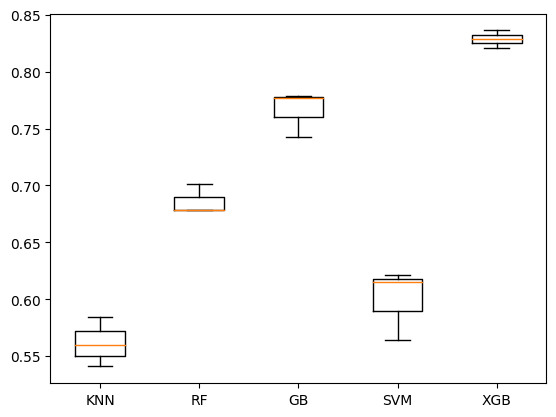

In [106]:
print("Strategy 1:")

models = []

def classification_Models(X1_train, X1_test, y1_train, y1_test):

    models.append(("KNN", KNeighborsClassifier()))
    models.append(("RF", RandomForestClassifier()))
    models.append(("GB", GradientBoostingClassifier()))
    models.append(("SVM", SVC()))
    models.append(("XGB", XGBClassifier()))

    modeloutcomes = []
    modelnames = []
    for name, model in models:
        v_results = cross_val_score(model, X1_train, y1_train_mapped, cv = 3, scoring = "accuracy", n_jobs = -1, verbose = 0)
        print(name, v_results.mean())
        modeloutcomes.append(v_results)
        modelnames.append(name)

    print(modeloutcomes)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.set_xticklabels(modelnames)
    plt.boxplot(modeloutcomes)

classification_Models(X1_train, X1_test, y1_train_mapped, y1_test)

Strategy 2:
KNN 0.9126570793449167
RF 0.9843790167702521
GB 0.9872158962028762
SVM 0.9240136702505709
XGB 0.9836667725203769
[array([0.89148936, 0.91471215, 0.93176972]), array([0.9787234 , 0.99147122, 0.98294243]), array([0.98723404, 0.98720682, 0.98720682]), array([0.91276596, 0.93390192, 0.92537313]), array([0.98085106, 0.98720682, 0.98294243])]


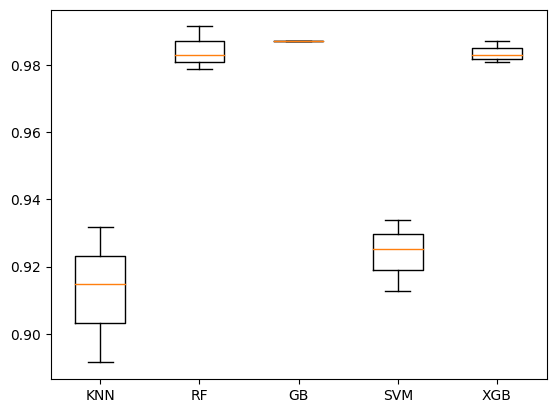

In [107]:
print("Strategy 2:")

models = []

def classification_Models(X2_train, X2_test, y2_train, y2_test ):

    models.append(("KNN", KNeighborsClassifier()))
    models.append(("RF", RandomForestClassifier()))
    models.append(("GB", GradientBoostingClassifier()))
    models.append(("SVM", SVC()))
    models.append(("XGB", XGBClassifier()))

    modeloutcomes = []
    modelnames = []
    for name, model in models:
        v_results = cross_val_score(model, X2_train, y2_train_mapped, cv = 3, scoring = "accuracy", n_jobs = -1, verbose = 0)
        print(name, v_results.mean())
        modeloutcomes.append(v_results)
        modelnames.append(name)

    print(modeloutcomes)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.set_xticklabels(modelnames)
    plt.boxplot(modeloutcomes)

classification_Models(X2_train, X2_test, y2_train_mapped, y2_test)

**Tuning classifiers**

In [108]:
gb1_1 = GradientBoostingClassifier(n_estimators = 300, max_leaf_nodes = 10)
gb1_1.fit(X1_train, y1_train)
gb1_1_y_pred = gb1_1.predict(X1_test)

gb2_2 = GradientBoostingClassifier(n_estimators = 300, max_leaf_nodes = 10)
gb2_2.fit(X2_train, y2_train)
gb2_2_y_pred = gb2_2.predict(X2_test)

In [109]:
print("Feature Importance of Gradient Boosting Classifier with Parameters, Strategy 1: \n")
for name, score in zip(strategy_1, gb1_1.feature_importances_):
    print(name, score)

Feature Importance of Gradient Boosting Classifier with Parameters, Strategy 1: 

Open 0.015793960404491214
High 0.026861089197847902
Low 0.01907554765190853
Close 0.02716849769292037
Adj Close 0.4396943668139373
Volume 0.04337333825474188
Adj Close Next Day 0.4280331999841528


In [110]:
print("Feature Importance of Gradient Boosting Classifier with Parameters, Strategy 2: \n")
for name, score in zip(strategy_2, gb2_2.feature_importances_):
    print(name, score)

Feature Importance of Gradient Boosting Classifier with Parameters, Strategy 2: 

Open 0.007549780263066796
High 0.048932753366920885
Low 0.008002295597562032
Close 0.016107649707177495
Adj Close 0.006847798463671761
Volume 0.0011037819903002154
Adj Close Next Day 0.001348013705783134
50 Day Moving Average 0.572046783843308
200 Day Moving Average 0.3380611430622097


In [111]:
gb1 = GradientBoostingClassifier(n_estimators = 20, learning_rate = 0.5, max_features = 2, max_depth = 2, random_state = 0)
gb1.fit(X1_train, y1_train)
gb1_y_pred = gb1.predict(X1_test)
print("GB1 F1-Score (Testing): ", f1_score(y1_test, gb1_y_pred))
print("GB1 Accuracy Score (Training): {0:.6f}".format(gb1.score(X1_train, y1_train)))
print("GB1 Accuracy Score (Testing): {0:.6f}".format(gb1.score(X1_test, y1_test)))

print("\n")

gb2 = GradientBoostingClassifier(n_estimators = 20, learning_rate = 0.5, max_features = 2, max_depth = 2, random_state = 0)
gb2.fit(X2_train, y2_train)
gb2_y_pred = gb2.predict(X2_test)
print("GB2 F1-Score (Testing): ", f1_score(y2_test, gb2_y_pred))
print("GB2 Accuracy Score (Training): {0:.6f}".format(gb2.score(X2_train, y2_train)))
print("GB2 Accuracy Score (Testing): {0:.6f}".format(gb2.score(X2_test, y2_test)))

GB1 F1-Score (Testing):  0.6844444444444445
GB1 Accuracy Score (Training): 0.711111
GB1 Accuracy Score (Testing): 0.639594


GB2 F1-Score (Testing):  0.8438356164383561
GB2 Accuracy Score (Training): 0.882102
GB2 Accuracy Score (Testing): 0.838527


In [112]:
print("Gradient Boosting Strategy 1 \nConfusion Matrix: \n", confusion_matrix(y1_test, gb1_y_pred))

Gradient Boosting Strategy 1 
Confusion Matrix: 
 [[ 98 112]
 [ 30 154]]


In [113]:
print("Gradient Boosting Strategy 2 \nClassification Matrix: \n", classification_report(y2_test, gb2_y_pred))

Gradient Boosting Strategy 2 
Classification Matrix: 
               precision    recall  f1-score   support

          -1       0.85      0.82      0.83       174
           1       0.83      0.86      0.84       179

    accuracy                           0.84       353
   macro avg       0.84      0.84      0.84       353
weighted avg       0.84      0.84      0.84       353

